#安裝套件

In [4]:
!pip install yfinance

In [5]:
!pip install mplfinance

#抓取股價資料

In [94]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

In [85]:
# 設定台積電的股票代碼
stock_id = "2330.TW"  # 台積電在台灣證券交易所的代碼

start = dt.datetime(2020, 1, 1)  # 指定的開始日期
end = dt.datetime(2024, 1, 1)

# 抓取股價資料
data = yf.download(stock_id, start=start, end=end)

# 清理資料，將二維欄位名稱平展成一維
data.columns = data.columns.map(lambda x: x[0])  # 取得第二層的欄位名稱

data.reset_index(inplace=True)

data['Date'] = data['Date'].dt.date

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

# 顯示資料
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,306.430176,339.0,339.0,332.5,332.5,31754120
2020-01-03,306.882202,339.5,345.0,335.5,344.0,41811268
2020-01-06,300.102661,332.0,334.5,332.0,333.0,45343057
2020-01-07,297.842926,329.5,333.0,326.5,332.5,50879181
2020-01-08,297.842926,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...
2023-12-25,573.515564,581.0,585.0,580.0,582.0,9548143
2023-12-26,578.451111,586.0,586.0,582.0,583.0,16094308
2023-12-27,584.373840,592.0,592.0,586.0,587.0,33401336


#類神經網路模型預測股票價格

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [88]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[['Close']][:train_size], data[['Close']][train_size:]

In [89]:
# 創建 MinMaxScaler 實例，設定範圍為 (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# 使用訓練數據來擬合標準化模型，並對訓練和測試數據進行轉換
train_data_scaled = scaler.fit_transform(train_data)  # 擬合並轉換訓練數據
test_data_scaled = scaler.transform(test_data)        # 僅轉換測試數據

In [90]:

model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # 第一隱藏層
model.add(Dense(32, activation='relu'))               # 第二隱藏層
model.add(Dense(1, activation='linear'))              # 輸出層
model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
X_train, y_train = train_data_scaled[:-1], train_data_scaled[1:] # 使用今天的股價預測明天的股價
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2789
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9131e-04 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5104e-04
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9338e-04 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5335e-04 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3538e-04 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3722e-04 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8005e-04
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8952e-04 
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1766e-04 
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 

In [92]:
X_test, y_test = test_data_scaled[:-1], test_data_scaled[1:]
predictions = model.predict(X_test)

predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Root Mean Squared Error (RMSE): 6.7202126306062455


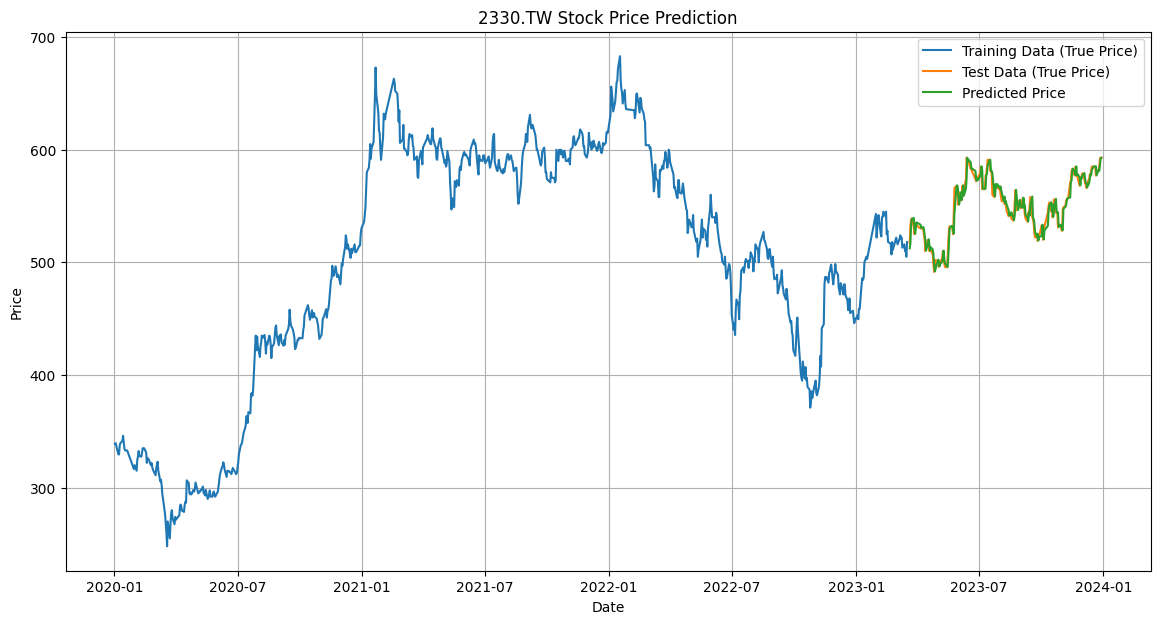

In [93]:
# 可視化訓練集與測試集
plt.figure(figsize=(14, 7))

# 繪製訓練集的真實價格
plt.plot(data.index[:train_size], train_data, label="Training Data (True Price)")  # 訓練集真實值

# 調整測試資料的索引範圍，確保預測和實際值對齊
adjusted_index = data.index[train_size + 1 : train_size + 1 + len(predictions_rescaled)]

# 繪製測試集的真實價格與預測價格
plt.plot(adjusted_index, y_test_rescaled[:len(predictions_rescaled)], label="Test Data (True Price)")  # 測試集真實值
plt.plot(adjusted_index, predictions_rescaled, label="Predicted Price")  # 預測值

# 繪圖標題與軸標籤
plt.title("2330.TW Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")

# 加上圖例與格線
plt.legend()
plt.grid(True)

# 顯示圖表
plt.show()

#使用 TensorFlow 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

In [3]:
# 設定台積電的股票代碼
stock_id = "2330.TW"  # 台積電在台灣證券交易所的代碼

start = dt.datetime(2024, 4, 1)  # 指定的開始日期
end = dt.datetime(2024, 10, 10)

# 抓取股價資料
data = yf.download(stock_id, start=start, end=end)

# 清理資料，將二維欄位名稱平展成一維
data.columns = data.columns.map(lambda x: x[0])  # 取得第二層的欄位名稱

data.reset_index(inplace=True)

data['Date'] = data['Date'].dt.date

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

# 顯示資料
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-04-01,763.630066,770.0,783.0,769.0,783.0,21041261
2024-04-02,783.464661,790.0,790.0,783.0,784.0,37974481
2024-04-03,773.547363,780.0,785.0,778.0,783.0,30890544
2024-04-08,776.522583,783.0,792.0,783.0,789.0,32202226
2024-04-09,812.224731,819.0,820.0,792.0,795.0,56857731
...,...,...,...,...,...,...
2024-10-01,972.000000,972.0,977.0,967.0,967.0,26760355
2024-10-04,977.000000,977.0,986.0,967.0,986.0,40934818
2024-10-07,1005.000000,1005.0,1010.0,989.0,993.0,39667071


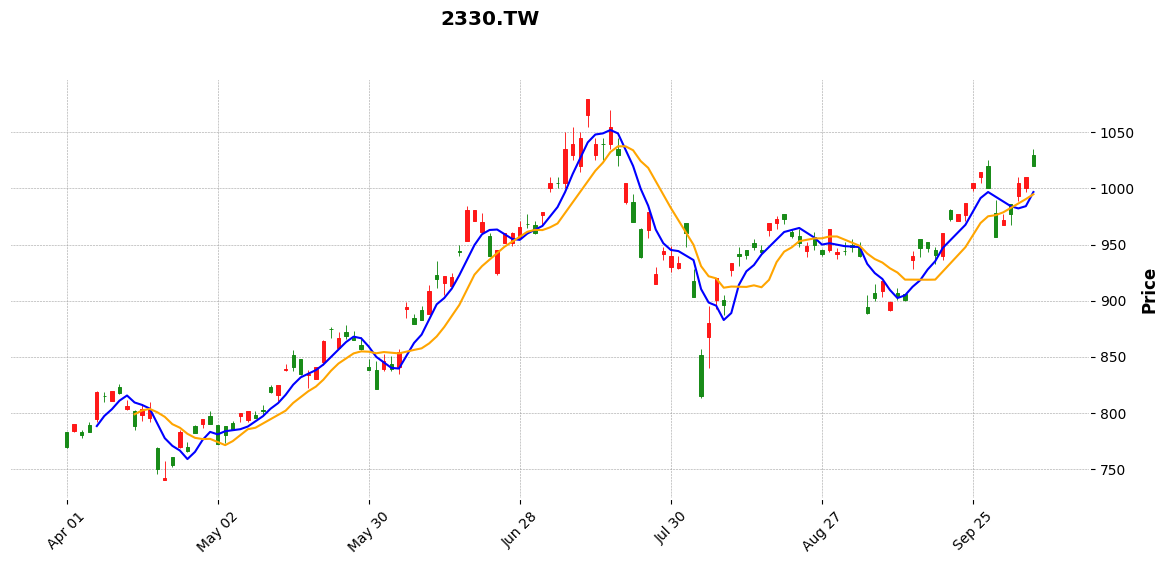

In [6]:
import mplfinance as mpf

# 設置 K 線繪圖風格，漲為紅色，跌為綠色
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=my_color)

# 計算 5 日和 10 日均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()

# 設定兩條均線的顏色
add_plots = [
    mpf.make_addplot(data['MA5'], color='blue', width=1.5),
    mpf.make_addplot(data['MA10'], color='orange', width=1.5)
]

# 繪製 K 線圖並添加均線
mpf.plot(data,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         addplot=add_plots)

# 保存帶有不同顏色均線的 K 線圖
mpf.plot(data,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         addplot=add_plots,
         savefig='k_line_with_colored_ma.png')

In [7]:
# 設定台積電的股票代碼
stock_id = "2330.TW"  # 台積電在台灣證券交易所的代碼

start = dt.datetime(2018, 1, 1)  # 指定的開始日期
end = dt.datetime(2024, 10, 10)

# 抓取股價資料
data = yf.download(stock_id, start=start, end=end)

# 清理資料，將二維欄位名稱平展成一維
data.columns = data.columns.map(lambda x: x[0])  # 取得第二層的欄位名稱

data.reset_index(inplace=True)

data['Date'] = data['Date'].dt.date

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

# 顯示資料
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,193.360672,232.5,232.5,231.0,231.5,18055269
2018-01-03,197.103119,237.0,238.0,235.5,236.0,29308091
2018-01-04,199.182281,239.5,240.0,236.5,240.0,29096613
2018-01-05,199.598099,240.0,240.0,238.0,240.0,22438255
2018-01-08,201.261398,242.0,242.5,240.5,242.0,20233692
...,...,...,...,...,...,...
2024-10-01,972.000000,972.0,977.0,967.0,967.0,26760355
2024-10-04,977.000000,977.0,986.0,967.0,986.0,40934818
2024-10-07,1005.000000,1005.0,1010.0,989.0,993.0,39667071


In [8]:
from PIL import Image # 處理圖像資料
import random # 隨機
import os # 系統檔，讀取資料使用
import mplfinance as mpf

window_size = 30  # K線圖的時間窗口

# 定義短期和長期均線的週期
short_window = 5  # 短期均線
long_window = 20  # 長期均線

# K線圖保存的文件夹
output_dir = 'k_line_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 儲存標籤
labels = []
file_names = []

# 片利數據並生成標籤和 K 線圖
for i in range(len(data) - window_size):
    window_data = data.iloc[i:i + window_size]  # 當前 K 線圖窗口

    # 計算短期均線和長期均線
    short_ma = window_data['Close'].rolling(window=short_window).mean().iloc[-1]
    long_ma = window_data['Close'].rolling(window=long_window).mean().iloc[-1]

    # print(f'窗口{i}的短期均線: {short_ma}, 長期均線: {long_ma}, 標記為', end='')

    # 判斷漲跌：短期均線高於長期均縣則標記為漲，否則標記為跌
    if short_ma > long_ma:
        labels.append(1)  # 漲
        # print('「漲」: 1')
    else:
        labels.append(0)  # 跌
        # print('「跌」: 0')

    # print('\n--------------------------------\n')

    # 生成文件名
    file_name = f'k_line_{i}.png'
    file_names.append(file_name)

    # 保存 K 線圖
    mpf.plot(window_data, type='candle', style=my_style, axisoff=True,
             figsize=(15, 6), savefig=os.path.join(output_dir, file_name))

# 保存標籤到 CSV 文件中
labels_df = pd.DataFrame({
    'file_name': file_names,
    'label': labels
})

labels_df.to_csv('labels.csv', index=False)

In [9]:
# 顯示漲跌數據筆數
labels_df['label'].value_counts()

,count
label,
1,927
0,687


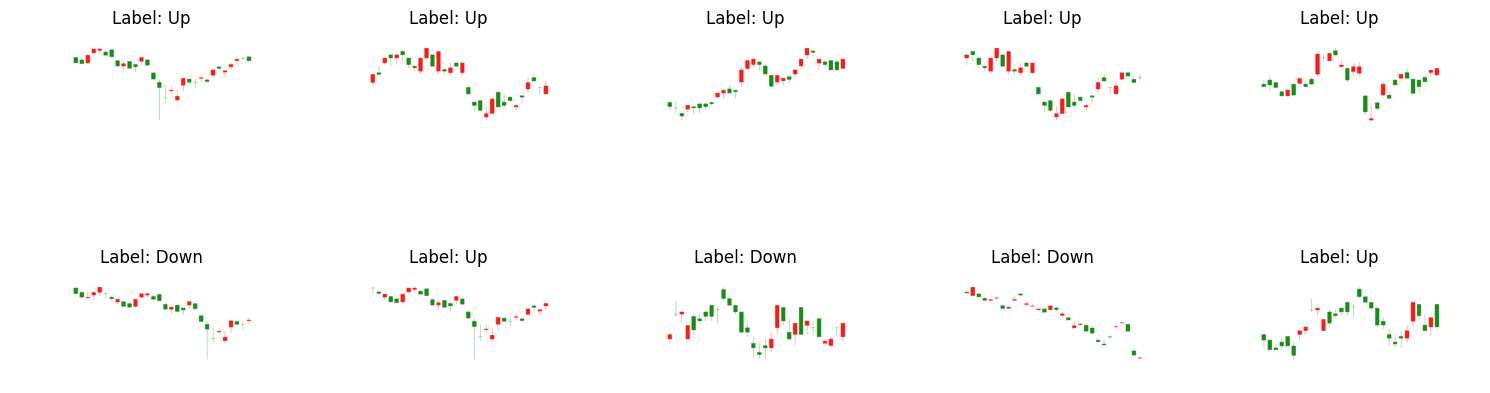

In [10]:
# 載入 CSV label檔案
output_dir = 'k_line_images'
labels_df = pd.read_csv('labels.csv', dtype={'label': str})

# 隨機選10張圖
random_indices = random.sample(range(len(labels_df)), 10)
selected_images = labels_df.iloc[random_indices]

# 設定 2*5 畫布
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# 將圖放進畫布中
for i, (index, row) in enumerate(selected_images.iterrows()):
    img_path = os.path.join(output_dir, row['file_name'])
    img = Image.open(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {'Up' if row['label'] == '1' else 'Down'}")

plt.tight_layout()
plt.show()

In [11]:
# 用於資料集拆分訓練、驗證、測試
from sklearn.model_selection import train_test_split

# 先從原始資料中切分出測試集 (20%)
train_df, test_df = train_test_split(labels_df, test_size=0.2, stratify=labels_df['label'], random_state=42)

# 然後再把訓練集劃分成訓練集與驗證集 (80% 訓練，20% 驗證)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# K線圖位置路徑
image_dir = 'k_line_images/'

# 建立資料集生成器
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,     # 隨機選轉
    width_shift_range=0.1,  # 水平平移
    height_shift_range=0.1, # 垂直平移
    zoom_range=0.1,         # 隨機縮放
    horizontal_flip=True,   # 水平翻轉
    validation_split=0.2)   # 20% 當驗證集

In [13]:
# 訓練集生成器
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 驗證集生成器
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary'
)

# 測試集生成器（注意這裡不進行資料增強）
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_dir,
    x_col="file_name",
    y_col="label",
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary',
    shuffle=False  # 測試集不需要隨機打亂
)

Found 1032 validated image filenames belonging to 2 classes.
Found 259 validated image filenames belonging to 2 classes.
Found 323 validated image filenames belonging to 2 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # 模型容器
from tensorflow.keras.layers import (
    Input, # 輸入層
    Conv2D,  # 卷積層
    MaxPooling2D, # 最大池化層
    Flatten, # 展平層
    Dense, # 全連接層
    LeakyReLU, # 避免梯度消失
    Dropout, # 避免過擬合
    BatchNormalization # 批次正規化
)
from tensorflow.keras.optimizers import Adam # 模型優化器
from tensorflow.keras.callbacks import ReduceLROnPlateau # 動態調整學習率

# 設定學習率動態調整
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# 建立模型容器
model = Sequential()

model.add(Input(shape=(150, 150, 3)))

# 第一層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(32, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第二層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 第三層卷積層 + 批次歸一化 + LeakyReLU + 最大池化
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D((2, 2)))

# 加入 Dropout 層來防止過擬合
model.add(Dropout(0.2))

# 展平層
model.add(Flatten())

# 全連接層 + LeakyReLU
model.add(Dense(128))
# 加入 Dropout 層
model.add(Dropout(0.2))

model.add(Dense(64))
# 加入 Dropout 層
model.add(Dropout(0.2))

# 輸出層（使用 sigmoid 進行二元分類）
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# 模型訓練
hist = model.fit(
    train_generator,  # 訓練集生成器
    validation_data=validation_generator,  # 驗證集生成器
    epochs=30,  # 訓練週期
    callbacks=[reduce_lr]  # 使用動態調整學習率的回调函數
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 233ms/step - accuracy: 0.6077 - loss: 10.3754 - val_accuracy: 0.5753 - val_loss: 3.9782 - learning_rate: 0.0010
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 32s 223ms/step - accuracy: 0.6735 - loss: 4.4440 - val_accuracy: 0.5753 - val_loss: 3.4448 - learning_rate: 0.0010
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 48s 274ms/step - accuracy: 0.6852 - loss: 2.2385 - val_accuracy: 0.5753 - val_loss: 5.2415 - learning_rate: 0.0010
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 39s 260ms/step - accuracy: 0.6680 - loss: 1.6701 - val_accuracy: 0.6988 - val_loss: 0.8188 - learning_rate: 0.0010
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 35s 264ms/step - accuracy: 0.7045 - loss: 1.0705 - val_accuracy: 0.6409 - val_loss: 0.7176 - learning_rate: 0.0010
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 34s 253ms/step - accuracy: 0.6801 - loss: 0.9319 - val_accuracy: 0.4247 - val_loss: 8.1749 - learning_rate: 0.0010
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - accuracy: 0.7216 - loss

In [16]:
# 測試模型
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.8933 - loss: 0.2795
Test accuracy: 0.8792569637298584


In [17]:
# 獲取一批測試集圖片
test_images, test_labels = next(test_generator)
# 預測測試集
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


實際結果： 跌
預測結果： 跌


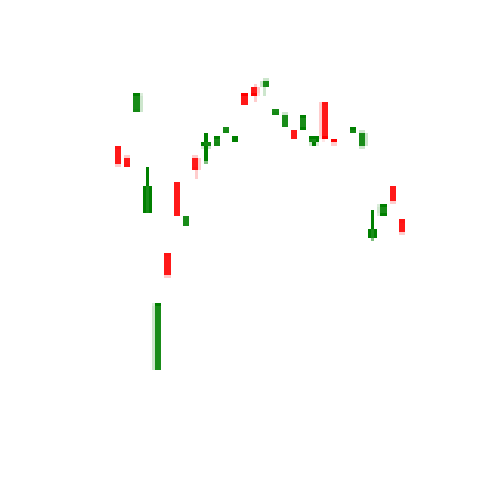

In [18]:
print('實際結果：', '漲' if test_labels[0] == 1 else '跌') # 實際邊謙 0 為跌 1 為漲
print('預測結果：', '漲' if predictions[0] > 0.5 else '跌') # Sigmoid 0.5 為閾值

plt.figure(figsize=(15, 6))
plt.imshow(test_images[0])
plt.axis('off')
plt.show()